In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import precision_score,confusion_matrix,recall_score,accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans


In [2]:
amazon_df = pd.read_csv('Amazon_Reviews.csv')
amazon_df

,Review,Label
0,Stuning even for the non-gamer: This sound tr...,1
1,The best soundtrack ever to anything.: I'm re...,1
2,Amazing!: This soundtrack is my favorite musi...,1
3,Excellent Soundtrack: I truly like this sound...,1
4,"Remember, Pull Your Jaw Off The Floor After H...",1
...,...,...
194,A Book That Is Worth a Second Look: This book...,1
195,Best game ever: This games makes even amazing...,1
196,Guitar in Absentia: With all due respect to a...,0
197,Stiff and Smells like drying paint: You get w...,0


In [3]:
y = amazon_df['Label']  
amazon_df.drop(columns='Label', inplace = True)

In [4]:
regexp = RegexpTokenizer(r'\w+')       #splits a string into substrings using a regular expression
stopwords_en = stopwords.words('english')
lemmatizer   = WordNetLemmatizer()      
vectorizer   = TfidfVectorizer()   #transform text into numbers which is used to fit algorithm for prediction.

In [5]:
X_train,X_test,y_train,y_test = train_test_split(amazon_df,y,test_size=0.2,random_state=42)


In [6]:
vectorizer.decode(X_train['Review'][0])

' Stuning even for the non-gamer: This sound track was beautiful! It paints the senery in your mind so well I would recomend it even to people who hate video game music! I have played the game Chrono Cross but out of all of the games I have ever played it has the best music! It backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. It would impress anyone who cares to listen! ^_^'

In [7]:
def preprocessing(review):
    
    tokens=regexp.tokenize(review)
    
    pure_tokens=[token.lower() for token in tokens if token.lower() not in stopwords_en]
    
    lemma_tokens=[lemmatizer.lemmatize(pure_token,pos='v') for pure_token in pure_tokens]
    
    return ' '.join(lemma_tokens)

In [8]:
#applying preprocessing on train and test data

X_train['Review']=X_train['Review'].apply(preprocessing)

X_test['Review']=X_test['Review'].apply(preprocessing)

In [9]:
X_train_tfidf = vectorizer.fit_transform(X_train['Review'])

X_test_tfidf = vectorizer.transform(X_test['Review'])

In [10]:
#Logistic regression 

log_reg = LogisticRegression()
log_reg.fit(X_train_tfidf,y_train)
log_pred = log_reg.predict(X_test_tfidf)

In [11]:
confusion_matrix(y_test,log_pred)

array([[ 9,  6],
       [ 1, 24]], dtype=int64)

In [12]:
recall_logistic    = recall_score(y_test,log_pred)
precision_logistic = precision_score(y_test,log_pred)
accuracy_logistic = accuracy_score(y_test,log_pred)
f1_score_logistic =  f1_score(y_test,log_pred)

In [13]:
#Lasso 
lasso = Lasso()
lasso.fit(X_train_tfidf,y_train)
coeff = lasso.coef_
len(coeff[coeff==0])

2348

In [14]:
#Decision tree
tree = DecisionTreeClassifier(random_state=42, max_depth=6)
tree.fit(X_train_tfidf,y_train)
tree_pred = tree.predict(X_test_tfidf)


In [15]:
recall_tree = recall_score(y_test,tree_pred)
precision_tree = precision_score(y_test,tree_pred)
accuracy_tree = accuracy_score(y_test,tree_pred)
f1_score_tree =  f1_score(y_test,tree_pred)

In [16]:
#AdaBoostClassifier with GridSearchCV

para_dic =({'learning_rate':[0.01,0.5,5],
          'n_estimators':[100,200,300,400]})

boost = AdaBoostClassifier(random_state=42)

adaboost_GCV = GridSearchCV(boost,param_grid=para_dic, cv=5, verbose=5)


In [17]:
adaboost_GCV.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.01, n_estimators=100, score=0.625, total=   0.6s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.688, total=   0.4s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.9s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.562, total=   0.3s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.2s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.500, total=   0.4s
[CV] learning_rate=0.01, n_estimators=100 ............................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s


[CV]  learning_rate=0.01, n_estimators=100, score=0.613, total=   0.3s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.656, total=   0.8s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.812, total=   0.6s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.562, total=   0.7s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.531, total=   0.7s
[CV] learning_rate=0.01, n_estimators=200 ............................
[CV]  learning_rate=0.01, n_estimators=200, score=0.613, total=   0.7s
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  learning_rate=0.01, n_estimators=300, score=0.656, total=   1.0s
[CV] learning_rate=0.01, n_estimators=300 ............................
[CV]  

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   46.2s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=42),
             iid='deprecated', n_jobs=None,
             param_grid={'learning_rate': [0.01, 0.5, 5],
                         'n_estimators': [100, 200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [18]:
ada_pred = adaboost_GCV.predict(X_test_tfidf)

adaboost_precision = precision_score(y_test,ada_pred)
adaboost_recall = recall_score(y_test,ada_pred)
adaboost_f1_score = f1_score(y_test,ada_pred)

In [19]:
#GridSeachCV for GradientBoostingClassifier 

param_dic =({'learning_rate':[0.01,0.5,5],
          'n_estimators':[100,200,300,400],
           'max_depth' : [5,6,7]})

grad_boost = GradientBoostingClassifier(random_state=42)

grad_boost_GCV = GridSearchCV(grad_boost,param_grid=param_dic, cv=5, verbose=5)
grad_boost_GCV.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.688, total=   0.9s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.750, total=   0.6s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.4s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.594, total=   0.6s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.0s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.594, total=   0.7s
[CV] learning_rate=0.01, max_depth=5, n_estimators=100 ...............


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    2.7s remaining:    0.0s


[CV]  learning_rate=0.01, max_depth=5, n_estimators=100, score=0.581, total=   0.6s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.688, total=   1.3s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.781, total=   1.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.656, total=   1.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.531, total=   1.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=200 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=200, score=0.548, total=   1.2s
[CV] learning_rate=0.01, max_depth=5, n_estimators=300 ...............
[CV]  learning_rate=0.01, max_depth=5, n_estimators=300, score=0.625, 

[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, score=0.500, total=   2.8s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, score=0.625, total=   2.9s
[CV] learning_rate=0.01, max_depth=7, n_estimators=400 ...............
[CV]  learning_rate=0.01, max_depth=7, n_estimators=400, score=0.548, total=   3.2s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.625, total=   0.3s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.688, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.625, total=   0.4s
[CV] learning_rate=0.5, max_depth=5, n_estimators=100 ................
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100, score=0.625, tota

[CV]  learning_rate=0.5, max_depth=7, n_estimators=300, score=0.781, total=   0.4s
[CV] learning_rate=0.5, max_depth=7, n_estimators=300 ................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=300, score=0.594, total=   0.5s
[CV] learning_rate=0.5, max_depth=7, n_estimators=300 ................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=300, score=0.594, total=   0.4s
[CV] learning_rate=0.5, max_depth=7, n_estimators=300 ................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=300, score=0.548, total=   0.5s
[CV] learning_rate=0.5, max_depth=7, n_estimators=400 ................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=400, score=0.594, total=   0.5s
[CV] learning_rate=0.5, max_depth=7, n_estimators=400 ................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=400, score=0.781, total=   0.7s
[CV] learning_rate=0.5, max_depth=7, n_estimators=400 ................
[CV]  learning_rate=0.5, max_depth=7, n_estimators=400, score=0.594, total= 

[CV]  learning_rate=5, max_depth=7, n_estimators=200, score=0.531, total=   0.2s
[CV] learning_rate=5, max_depth=7, n_estimators=200 ..................
[CV]  learning_rate=5, max_depth=7, n_estimators=200, score=0.500, total=   0.1s
[CV] learning_rate=5, max_depth=7, n_estimators=200 ..................
[CV]  learning_rate=5, max_depth=7, n_estimators=200, score=0.531, total=   1.1s
[CV] learning_rate=5, max_depth=7, n_estimators=200 ..................
[CV]  learning_rate=5, max_depth=7, n_estimators=200, score=0.548, total=   0.5s
[CV] learning_rate=5, max_depth=7, n_estimators=300 ..................
[CV]  learning_rate=5, max_depth=7, n_estimators=300, score=0.562, total=   0.2s
[CV] learning_rate=5, max_depth=7, n_estimators=300 ..................
[CV]  learning_rate=5, max_depth=7, n_estimators=300, score=0.531, total=   0.2s
[CV] learning_rate=5, max_depth=7, n_estimators=300 ..................
[CV]  learning_rate=5, max_depth=7, n_estimators=300, score=0.500, total=   0.3s
[CV] le

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  3.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
         

In [20]:
grad_pred = grad_boost_GCV.predict(X_test_tfidf)

GB_recall = recall_score(y_test,grad_pred)
GB_precision = precision_score(y_test,grad_pred)
GB_f1_score = f1_score(y_test,grad_pred)

In [21]:
#Random Forest
no_of_trees = list(range(15,150,15))
accur =[]
for num in no_of_trees:
    forest=RandomForestClassifier(n_estimators=num)
    forest.fit(X_train_tfidf,y_train)
    accur.append(forest.score(X_train_tfidf,y_train))

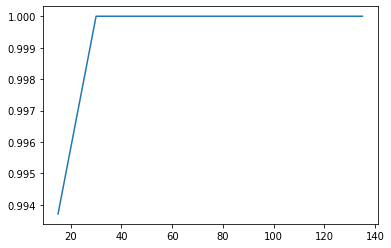

In [22]:
plt.plot(no_of_trees,accur)

In [25]:
#GridSearchCV with randomforest
rf = RandomForestClassifier(random_state=42)
param_dict = ({
    'n_estimators': [100,140,180],
    'max_depth':[6,7,8],
    'min_samples_split':[6,7,8],
    'max_features':['auto','sqrt','log2']
})

In [26]:
gd_sr = GridSearchCV(rf,param_grid=param_dict,cv=5,verbose=5)

gd_sr.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100 
[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100, score=0.531, total=   0.2s
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100, score=0.688, total=   0.2s
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100 
[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100, score=0.625, total=   0.2s
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100, score=0.625, total=   0.2s
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100 
[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=100, score=0.581, total=   0.2s
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=140 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=140, score=0.594, total=   0.3s
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=140 
[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=140, score=0.688, total=   0.2s
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=140 
[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=140, score=0.625, total=   0.2s
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=140 
[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=140, score=0.625, total=   0.2s
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=140 
[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=140, score=0.581, total=   0.2s
[CV] max_depth=6, max_features=auto, min_samples_split=6, n_estimators=180 
[CV]  max_depth=6, max_features=auto, min_samples_split=6, n_estimators=180, score=0.562, total=   0

[CV]  max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=140, score=0.625, total=   0.2s
[CV] max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=140 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=140, score=0.625, total=   0.2s
[CV] max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=140 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=140, score=0.581, total=   0.3s
[CV] max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=180 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=180, score=0.562, total=   0.2s
[CV] max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=180 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=180, score=0.656, total=   0.3s
[CV] max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=180 
[CV]  max_depth=6, max_features=sqrt, min_samples_split=6, n_estimators=180, score=0.625, total=   0

[CV]  max_depth=6, max_features=log2, min_samples_split=6, n_estimators=140, score=0.613, total=   0.2s
[CV] max_depth=6, max_features=log2, min_samples_split=6, n_estimators=180 
[CV]  max_depth=6, max_features=log2, min_samples_split=6, n_estimators=180, score=0.562, total=   0.3s
[CV] max_depth=6, max_features=log2, min_samples_split=6, n_estimators=180 
[CV]  max_depth=6, max_features=log2, min_samples_split=6, n_estimators=180, score=0.594, total=   0.3s
[CV] max_depth=6, max_features=log2, min_samples_split=6, n_estimators=180 
[CV]  max_depth=6, max_features=log2, min_samples_split=6, n_estimators=180, score=0.531, total=   0.2s
[CV] max_depth=6, max_features=log2, min_samples_split=6, n_estimators=180 
[CV]  max_depth=6, max_features=log2, min_samples_split=6, n_estimators=180, score=0.562, total=   0.2s
[CV] max_depth=6, max_features=log2, min_samples_split=6, n_estimators=180 
[CV]  max_depth=6, max_features=log2, min_samples_split=6, n_estimators=180, score=0.613, total=   0

[CV]  max_depth=7, max_features=auto, min_samples_split=6, n_estimators=180, score=0.594, total=   0.3s
[CV] max_depth=7, max_features=auto, min_samples_split=6, n_estimators=180 
[CV]  max_depth=7, max_features=auto, min_samples_split=6, n_estimators=180, score=0.688, total=   0.2s
[CV] max_depth=7, max_features=auto, min_samples_split=6, n_estimators=180 
[CV]  max_depth=7, max_features=auto, min_samples_split=6, n_estimators=180, score=0.625, total=   0.2s
[CV] max_depth=7, max_features=auto, min_samples_split=6, n_estimators=180 
[CV]  max_depth=7, max_features=auto, min_samples_split=6, n_estimators=180, score=0.656, total=   0.2s
[CV] max_depth=7, max_features=auto, min_samples_split=6, n_estimators=180 
[CV]  max_depth=7, max_features=auto, min_samples_split=6, n_estimators=180, score=0.581, total=   0.2s
[CV] max_depth=7, max_features=auto, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=auto, min_samples_split=7, n_estimators=100, score=0.562, total=   0

[CV]  max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=180, score=0.688, total=   0.3s
[CV] max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=180 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=180, score=0.625, total=   0.2s
[CV] max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=180 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=180, score=0.656, total=   0.3s
[CV] max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=180 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=6, n_estimators=180, score=0.581, total=   0.2s
[CV] max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.562, total=   0.1s
[CV] max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.719, total=   0

[CV]  max_depth=7, max_features=log2, min_samples_split=6, n_estimators=180, score=0.531, total=   0.2s
[CV] max_depth=7, max_features=log2, min_samples_split=6, n_estimators=180 
[CV]  max_depth=7, max_features=log2, min_samples_split=6, n_estimators=180, score=0.562, total=   0.2s
[CV] max_depth=7, max_features=log2, min_samples_split=6, n_estimators=180 
[CV]  max_depth=7, max_features=log2, min_samples_split=6, n_estimators=180, score=0.613, total=   0.3s
[CV] max_depth=7, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=log2, min_samples_split=7, n_estimators=100, score=0.594, total=   0.1s
[CV] max_depth=7, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=log2, min_samples_split=7, n_estimators=100, score=0.594, total=   0.1s
[CV] max_depth=7, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=7, max_features=log2, min_samples_split=7, n_estimators=100, score=0.531, total=   0

[CV]  max_depth=8, max_features=auto, min_samples_split=6, n_estimators=180, score=0.656, total=   0.2s
[CV] max_depth=8, max_features=auto, min_samples_split=6, n_estimators=180 
[CV]  max_depth=8, max_features=auto, min_samples_split=6, n_estimators=180, score=0.581, total=   0.3s
[CV] max_depth=8, max_features=auto, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_split=7, n_estimators=100, score=0.562, total=   0.1s
[CV] max_depth=8, max_features=auto, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_split=7, n_estimators=100, score=0.719, total=   0.1s
[CV] max_depth=8, max_features=auto, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_split=7, n_estimators=100, score=0.656, total=   0.2s
[CV] max_depth=8, max_features=auto, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=auto, min_samples_split=7, n_estimators=100, score=0.688, total=   0

[CV]  max_depth=8, max_features=sqrt, min_samples_split=6, n_estimators=180, score=0.581, total=   0.2s
[CV] max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.562, total=   0.1s
[CV] max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.719, total=   0.2s
[CV] max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.656, total=   0.2s
[CV] max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.688, total=   0.2s
[CV] max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=sqrt, min_samples_split=7, n_estimators=100, score=0.613, total=   0

[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=100, score=0.594, total=   0.2s
[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=100, score=0.531, total=   0.1s
[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=100, score=0.562, total=   0.2s
[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=100 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=100, score=0.645, total=   0.1s
[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=140 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=140, score=0.531, total=   0.2s
[CV] max_depth=8, max_features=log2, min_samples_split=7, n_estimators=140 
[CV]  max_depth=8, max_features=log2, min_samples_split=7, n_estimators=140, score=0.625, total=   0

[Parallel(n_jobs=1)]: Done 405 out of 405 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [27]:
grid_rf_pred = gd_sr.predict(X_test_tfidf)

print(confusion_matrix(y_test,grid_rf_pred))
precision_RF = precision_score(y_test,grid_rf_pred)
recall_RF = recall_score(y_test,grid_rf_pred)
accuracy_RF =  accuracy_score(y_test,grid_rf_pred)
f1_score_RF = f1_score(y_test,grid_rf_pred)

[[ 7  8]
 [ 0 25]]


In [28]:
best_parameters = gd_sr.best_params_
print(best_parameters)

{'max_depth': 8, 'max_features': 'auto', 'min_samples_split': 7, 'n_estimators': 100}


In [29]:
# Support Vector Machine 

svc = SVC(random_state=42)

svc_param = ({'C':[0.02,0.2,2,8],
             'kernel':['linear', 'rbf', 'sigmoid'],
             'gamma':['scale', 'auto']
             })

In [30]:
#GridSearchCV with SVC

grid_cv = GridSearchCV(svc, param_grid=svc_param, cv=5,verbose=5)
grid_cv.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.02, gamma=scale, kernel=linear ..............................
[CV] .. C=0.02, gamma=scale, kernel=linear, score=0.531, total=   0.2s
[CV] C=0.02, gamma=scale, kernel=linear ..............................
[CV] .. C=0.02, gamma=scale, kernel=linear, score=0.531, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=linear ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV] .. C=0.02, gamma=scale, kernel=linear, score=0.531, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=linear ..............................
[CV] .. C=0.02, gamma=scale, kernel=linear, score=0.562, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=linear ..............................
[CV] .. C=0.02, gamma=scale, kernel=linear, score=0.548, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=rbf .................................
[CV] ..... C=0.02, gamma=scale, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=rbf .................................
[CV] ..... C=0.02, gamma=scale, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=rbf .................................
[CV] ..... C=0.02, gamma=scale, kernel=rbf, score=0.531, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=rbf .................................
[CV] ..... C=0.02, gamma=scale, kernel=rbf, score=0.562, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=rbf .................................
[CV] .

[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] . C=0.02, gamma=scale, kernel=sigmoid, score=0.531, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=sigmoid .............................
[CV] . C=0.02, gamma=scale, kernel=sigmoid, score=0.531, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=sigmoid .............................
[CV] . C=0.02, gamma=scale, kernel=sigmoid, score=0.531, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=sigmoid .............................
[CV] . C=0.02, gamma=scale, kernel=sigmoid, score=0.562, total=   0.0s
[CV] C=0.02, gamma=scale, kernel=sigmoid .............................
[CV] . C=0.02, gamma=scale, kernel=sigmoid, score=0.548, total=   0.0s
[CV] C=0.02, gamma=auto, kernel=linear ...............................
[CV] ... C=0.02, gamma=auto, kernel=linear, score=0.531, total=   0.0s
[CV] C=0.02, gamma=auto, kernel=linear ...............................
[CV] ... C=0.02, gamma=auto, kernel=linear, score=0.531, total=   0.0s
[CV] C=0.02, gamma=auto, kernel=linear ...............................
[CV] .

[CV] .... C=2, gamma=scale, kernel=sigmoid, score=0.594, total=   0.0s
[CV] C=2, gamma=scale, kernel=sigmoid ................................
[CV] .... C=2, gamma=scale, kernel=sigmoid, score=0.719, total=   0.0s
[CV] C=2, gamma=scale, kernel=sigmoid ................................
[CV] .... C=2, gamma=scale, kernel=sigmoid, score=0.656, total=   0.0s
[CV] C=2, gamma=scale, kernel=sigmoid ................................
[CV] .... C=2, gamma=scale, kernel=sigmoid, score=0.656, total=   0.0s
[CV] C=2, gamma=scale, kernel=sigmoid ................................
[CV] .... C=2, gamma=scale, kernel=sigmoid, score=0.613, total=   0.0s
[CV] C=2, gamma=auto, kernel=linear ..................................
[CV] ...... C=2, gamma=auto, kernel=linear, score=0.625, total=   0.0s
[CV] C=2, gamma=auto, kernel=linear ..................................
[CV] ...... C=2, gamma=auto, kernel=linear, score=0.719, total=   0.0s
[CV] C=2, gamma=auto, kernel=linear ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    2.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=42, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.02, 0.2, 2, 8], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'sigmoid']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [31]:
grid_svc_pred = grid_cv.predict(X_test_tfidf)

print(confusion_matrix(y_test,grid_svc_pred))
svc_precision = precision_score(y_test,grid_svc_pred)
svc_recall = recall_score(y_test,grid_svc_pred)
svc_accuracy = accuracy_score(y_test,grid_svc_pred)
svc_f1_score =  f1_score(y_test,grid_svc_pred)

[[11  4]
 [ 2 23]]


In [32]:
#K-Nearest Neighbours

knn = KNeighborsClassifier()

knn_param = ({'n_neighbors':[2,3,4],
               'weights':['uniform','distance'] })

In [33]:
#GridSearchCV for KNN

grid_knn = GridSearchCV(knn, param_grid=knn_param,cv=5,verbose=5)
grid_knn.fit(X_train_tfidf,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.688, total=   0.2s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.594, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.531, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.594, total=   0.0s
[CV] n_neighbors=2, weights=uniform ..................................
[CV] ...... n_neighbors=2, weights=uniform, score=0.581, total=   0.0s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.625, total=   0.0s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.750, total=   0.0s
[CV] n_neighbors=2, weights=distance .................................
[CV] ..... n_neighbors=2, weights=distance, score=0.594, total=   0.0s
[CV] n

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.3s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [2, 3, 4],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=5)

In [34]:
grid_knn_pred = grid_knn.predict(X_test_tfidf)


In [35]:
print(confusion_matrix(y_test,grid_knn_pred))
print('accuracy',accuracy_score(y_test,grid_knn_pred))
print('f1 score',f1_score(y_test,grid_knn_pred))

[[ 9  6]
 [ 9 16]]
accuracy 0.625
f1 score 0.6808510638297872


In [36]:
#MultiNomial Naive Bayes

multi_nb = MultinomialNB()
multi_nb.fit(X_train_tfidf,y_train)
nb_pred = multi_nb.predict(X_test_tfidf)

NB_recall = recall_score(y_test,nb_pred)
NB_precision = precision_score(y_test,nb_pred)
NB_f1_score = f1_score(y_test,nb_pred)

In [37]:
# Evaluation Scores 

amazon_reviews_df = pd.DataFrame({'Model':['Logistic Regression','Decision Tree','RandomForest','AdaBoost','Gradient Boost','SVM','Multinomial NB'],
             'Hyperparameters':['none','none',list(param_dict.keys()),list(para_dic.keys()),list(param_dic.keys()),list(svc_param.keys()),'none'],
             'Recall Score':   [recall_logistic,recall_tree,recall_RF,adaboost_recall,GB_recall,svc_recall,NB_recall],
             'Precision Score':[precision_logistic,precision_tree,precision_RF,adaboost_precision,GB_precision,svc_precision,NB_precision],
             'F1 Score':       [f1_score_logistic,f1_score_tree,f1_score_RF,adaboost_f1_score,GB_f1_score,svc_f1_score,NB_f1_score]
             })
amazon_reviews_df

,Model,Hyperparameters,Recall Score,Precision Score,F1 Score
0,Logistic Regression,none,0.96,0.800000,0.872727
1,Decision Tree,none,0.64,0.761905,0.695652
2,RandomForest,"[n_estimators, max_depth, min_samples_split, m...",1.00,0.757576,0.862069
3,AdaBoost,"[learning_rate, n_estimators]",0.96,0.750000,0.842105
4,Gradient Boost,"[learning_rate, n_estimators, max_depth]",0.76,0.678571,0.716981
5,SVM,"[C, kernel, gamma]",0.92,0.851852,0.884615
6,Multinomial NB,none,0.92,0.793103,0.851852
